I am exploring the dataset having funding information of the Indian startups from January 2015.

In [1]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
df = pd.read_csv('startup_funding.csv')
df.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

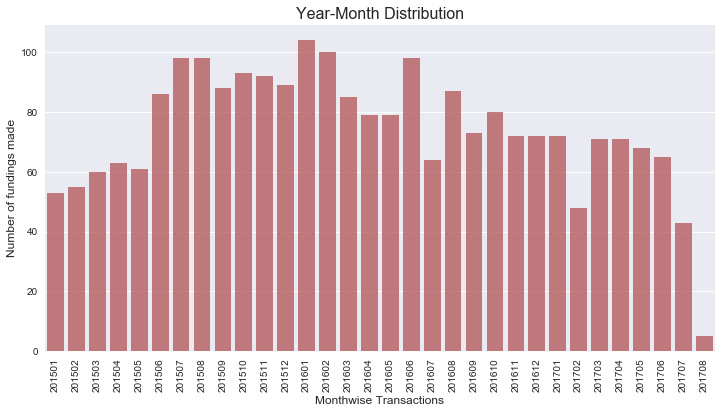

In [9]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

cnt_srs = df['yearmonth'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Monthwise Transactions', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [10]:
df["AmountInUSD"]

0        1,300,000
1              NaN
2              NaN
3          500,000
4          850,000
5        1,000,000
6        2,600,000
7       20,000,000
8        8,500,000
9       12,000,000
10       1,000,000
11             NaN
12             NaN
13       1,000,000
14             NaN
15       3,000,000
16       2,250,000
17         464,000
18             NaN
19      18,500,000
20             NaN
21             NaN
22             NaN
23         540,000
24       1,700,000
25       2,000,000
26       4,000,000
27             NaN
28             NaN
29             NaN
           ...    
2342       330,000
2343           NaN
2344       200,000
2345        16,000
2346        16,000
2347        16,000
2348        16,000
2349        16,000
2350    11,000,000
2351           NaN
2352       200,000
2353    14,750,000
2354       325,000
2355           NaN
2356     3,250,000
2357       200,000
2358           NaN
2359           NaN
2360    56,000,000
2361    31,000,000
2362     1,500,000
2363        

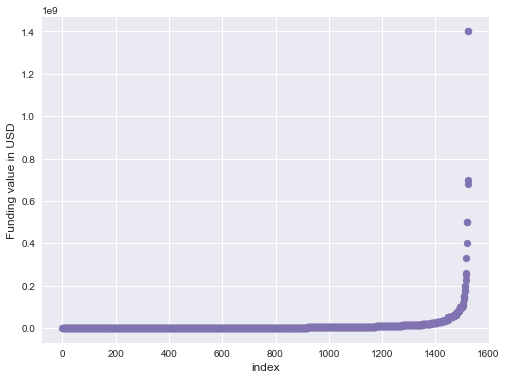

In [16]:
AmountInUSD = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
#Since it's a Investment amount we can't fill the missing values just by median or mode. So let's just delete remove null values. 
AmountInUSD = AmountInUSD[~np.isnan(AmountInUSD)]
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color=color[3])
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.show()

Now let's remove the outlier first and then again observe it.'

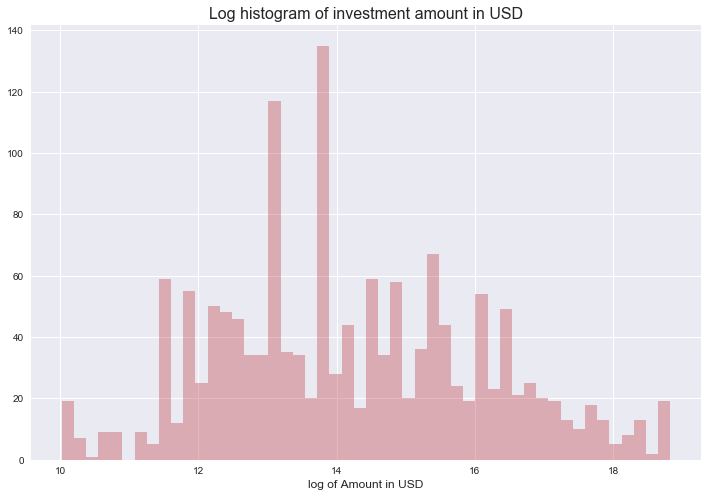

In [18]:
ulimit = np.percentile(AmountInUSD.values, 99)
llimit = np.percentile(AmountInUSD.values, 1)
AmountInUSD[AmountInUSD>ulimit] = ulimit
AmountInUSD[AmountInUSD<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(np.log(AmountInUSD.values), bins=50, kde=False, color=color[2])
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log histogram of investment amount in USD", fontsize=16)
plt.show()

In [19]:
df['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd funding        1
PrivateEquity        1
Crowd Funding        1
Debt Funding         1
Name: InvestmentType, dtype: int64

From above we can clearly observe that "Seed Funding" and "SeedFunding" are same things but written in 2 different ways. So we need to replace one of them and same thing to be done with "Private Equity" and "Crowd Funding".

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


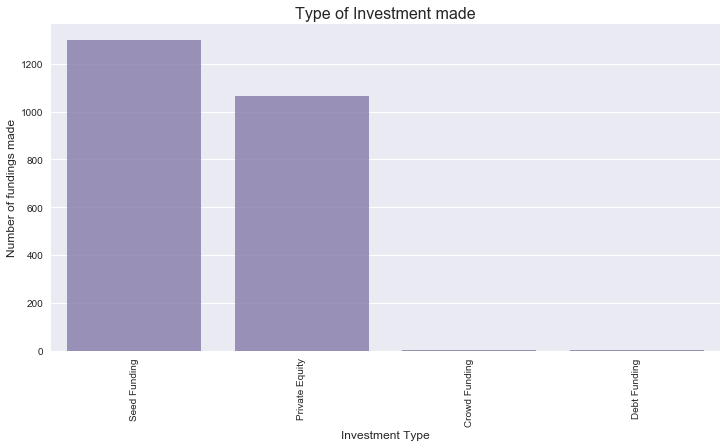

In [20]:
df['InvestmentType'][df['InvestmentType']=='SeedFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType']=='PrivateEquity'] = 'Private Equity'
df['InvestmentType'][df['InvestmentType']=='Crowd funding'] = 'Crowd Funding'

cnt_srs = df['InvestmentType'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

### Location

Now let us explore the importance of Location in our dataset.

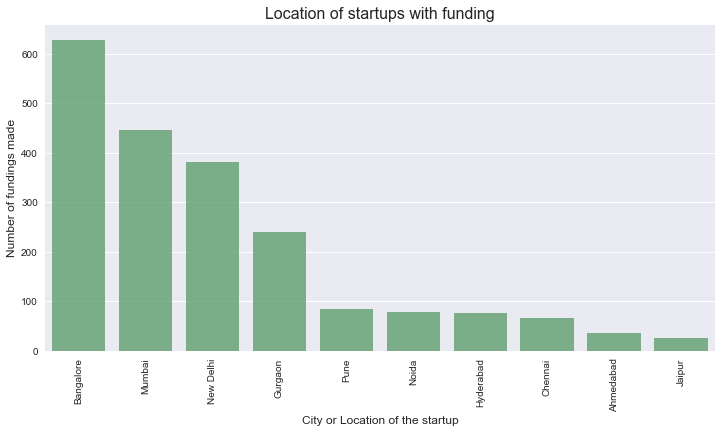

In [21]:
cnt_srs = df['CityLocation'].value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.xlabel('City or Location of the startup', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Location of startups with funding", fontsize=16)
plt.show()

So from this we found that Banglore seems to attract the lots of investment followed by Mumbai and New Delhi.

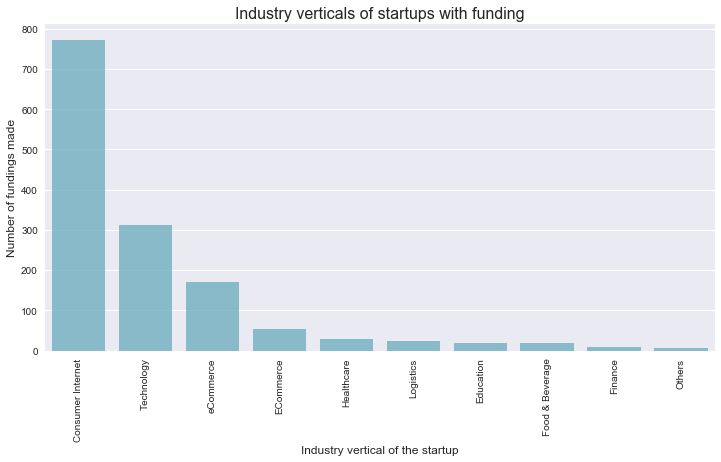

In [24]:
cnt_srs = df['IndustryVertical'].value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of the startup', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry verticals of startups with funding", fontsize=16)
plt.show()

From this we observed that Consumer Internet is the most popular start-up followed by Technology and eCommerece 

### Investors:

In [27]:
inv_names = []
for invs in df['InvestorsName']:
    for inv in str(invs).split(","):
        if inv != "":
            inv_names.append(inv.strip().lower().replace(" ","_"))

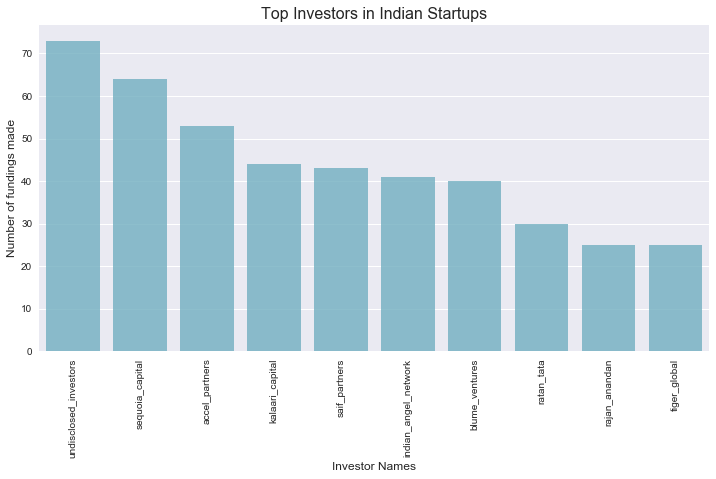

In [28]:
cnt_srs = pd.Series(inv_names).value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.xticks(rotation='vertical')
plt.xlabel('Investor Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Top Investors in Indian Startups", fontsize=16)
plt.show()

So Sequoia capital is the major investor in Indian startups (based on count) followed by Accel partners and Kalaari capital and Saif partners.